Clean data of student-mat.csv to select only relevant columns

In [8]:
%pip install pandas joblib scikit-learn

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 52.5 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import joblib


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset (replace with your actual file path)
df = pd.read_csv('student-mat.csv', delimiter=";")

# Selecting relevant columns for both tasks
selected_columns = ['sex', 'address', 'studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2', 'G3']
df = df[selected_columns]

# Assuming 'pass' column is defined based on the final grade
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)  # Create binary 'pass' column

# Define features and target
X = df.drop(columns=['G3', 'pass'])  # Use everything except final grade and pass for features
y = df['pass']  # 'pass' column as target for classification

# Handle categorical variables with One-Hot Encoding
categorical_cols = ['sex', 'address']
numerical_cols = ['studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2']

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], 
    remainder='passthrough'  # Keep other columns as they are (if any)
)

# Apply preprocessing to the features
X_processed = preprocessor.fit_transform(X)

# Get feature names after One-Hot Encoding for categorical columns
num_feature_names = numerical_cols
cat_feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combine all feature names
all_feature_names = list(num_feature_names) + list(cat_feature_names)

# Convert the processed data into a DataFrame with appropriate column names
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.3, random_state=42)

# Save the split datasets to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Data cleaning and preparation complete. Train and test sets saved.")


Data cleaning and preparation complete. Train and test sets saved.


Task 1 Pass/Fail Supervised Learning Task Automation

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8824
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        46
           1       0.88      0.93      0.91        73

    accuracy                           0.88       119
   macro avg       0.88      0.87      0.87       119
weighted avg       0.88      0.88      0.88       119

Confusion Matrix:
[[37  9]
 [ 5 68]]


In [3]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Best hyperparameters from grid search
print(f'Best Parameters: {grid_search.best_params_}')

# Use the best model
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {accuracy_best:.4f}')
print('Best Model Classification Report:')
print(classification_report(y_test, y_pred_best))
print('Best Model Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_best))


Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Best Model Accuracy: 0.8824
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        46
           1       0.88      0.93      0.91        73

    accuracy                           0.88       119
   macro avg       0.88      0.87      0.87       119
weighted avg       0.88      0.88      0.88       119

Best Model Confusion Matrix:
[[37  9]
 [ 5 68]]


In [11]:
# Load the dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib

# Load dataset
df = pd.read_csv('student-mat.csv', delimiter=";")
selected_columns = ['sex', 'address', 'studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2', 'G3']
df = df[selected_columns]

# Create 'pass' column
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Define features and target
X = df.drop(columns=['G3', 'pass'])
y = df['pass']

# Preprocessing pipeline
categorical_cols = ['sex', 'address']
numerical_cols = ['studytime', 'failures', 'freetime', 'goout', 'absences', 'G1', 'G2']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], 
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

# Get feature names after One-Hot Encoding
num_feature_names = numerical_cols
cat_feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = list(num_feature_names) + list(cat_feature_names)

X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f'Best Parameters: {grid_search.best_params_}')

# Use the best model
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {accuracy_best:.4f}')
print('Best Model Classification Report:')
print(classification_report(y_test, y_pred_best))
print('Best Model Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_best))

# Save the preprocessing pipeline and model
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(best_model, 'best_model.pkl')

# Save the entire pipeline (preprocessor + best model)
from sklearn.pipeline import Pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])
joblib.dump(full_pipeline, 'full_pipeline.pkl')

print("Model and preprocessing pipeline saved successfully.")


Accuracy: 0.8824
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        46
           1       0.88      0.93      0.91        73

    accuracy                           0.88       119
   macro avg       0.88      0.87      0.87       119
weighted avg       0.88      0.88      0.88       119

Confusion Matrix:
[[37  9]
 [ 5 68]]
Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Best Model Accuracy: 0.8824
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        46
           1       0.88      0.93      0.91        73

    accuracy                           0.88       119
   macro avg       0.88      0.87      0.87       119
weighted avg       0.88      0.88      0.88       119

Best Model Confusion Matrix:
[[37  9]
 [ 5 68]]
Model and preprocessing pipeline saved successfully.


Clustering

In [10]:
%pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.6 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.4 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


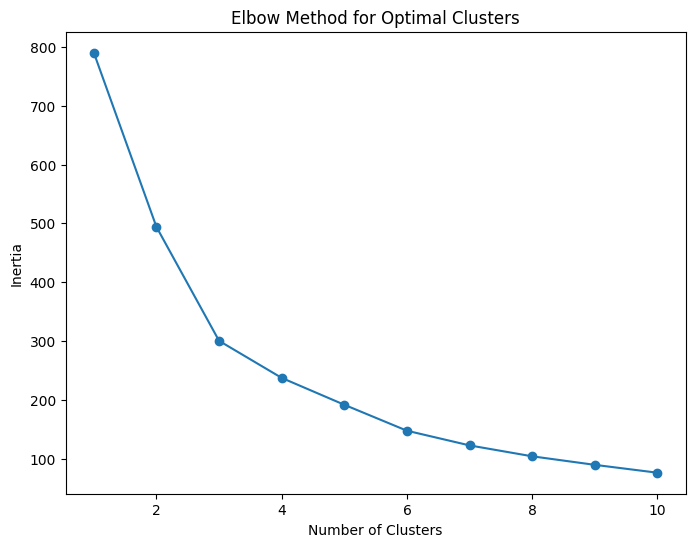

Silhouette Score: 0.41767046184431683


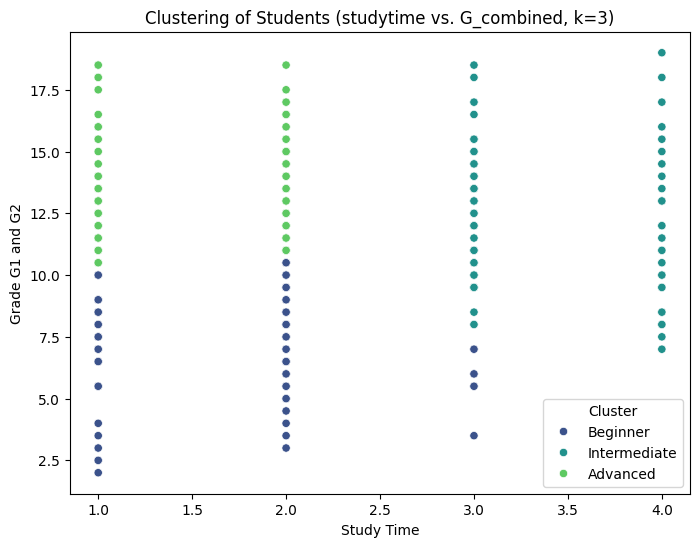

Cluster Centers:
[[-0.36965123 -0.90584383]
 [-0.47538476  0.75782995]
 [ 1.52975266  0.44606136]]
Clustering model, scaler, and cluster mapping saved successfully.


In [5]:
import joblib
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Selecting only studytime and result for clustering
df['G_combined'] = (df['G1'] + df['G2']) / 2  # Average of G1 and G2

# Selecting relevant features for clustering (studytime and combined grades)
X_cluster = df[['studytime', 'G_combined']]

# Normalize the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, init="k-means++", n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow plot, choose the best k (3)
optimal_k = 3  # Adjust based on your elbow plot observation
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init="k-means++", n_init=10)
df['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Calculate silhouette score
sil_score = silhouette_score(X_cluster_scaled, df['cluster'])
print(f'Silhouette Score: {sil_score}')

# Identify clusters based on G_combined (grade) and studytime
cluster_centers = kmeans.cluster_centers_
sorted_clusters = sorted(range(len(cluster_centers)), key=lambda x: cluster_centers[x, 1])  # Sorting by grade

# Mapping clusters to meaningful labels
cluster_mapping = {
    sorted_clusters[0]: 'Beginner',     # Lowest grade
    sorted_clusters[1]: 'Intermediate', # Middle grade
    sorted_clusters[2]: 'Advanced'      # Highest grade
}

# Apply the mapping to the dataframe
df['cluster_label'] = df['cluster'].map(cluster_mapping)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['studytime'], y=df['G_combined'], hue=df['cluster_label'], palette='viridis')
plt.title(f'Clustering of Students (studytime vs. G_combined, k={optimal_k})')
plt.xlabel('Study Time')
plt.ylabel('Grade G1 and G2')
plt.legend(title="Cluster")
plt.show()

# Show cluster centers
print('Cluster Centers:')
print(kmeans.cluster_centers_)

# Save the scaler, KMeans model, and cluster mapping
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(cluster_mapping, 'cluster_mapping.pkl')

print("Clustering model, scaler, and cluster mapping saved successfully.")


In [10]:
import os

if os.path.exists('full_pipeline.pkl'):
    print("File found!")
else:
    print("File not found!")


print("Current Working Directory:", os.getcwd())


File found!
Current Working Directory: /Users/albertwelong/cognizant_genai/.venv/capstone_project/updated


User Story 3: Image Generation with GANs

In [ ]:
%pip uninstall torch torchvision matplotlib numpy -y


Found existing installation: torch 2.2.2
Uninstalling torch-2.2.2:
  Successfully uninstalled torch-2.2.2
Found existing installation: torchvision 0.17.2
Uninstalling torchvision-0.17.2:
  Successfully uninstalled torchvision-0.17.2
Found existing installation: matplotlib 3.8.4
Uninstalling matplotlib-3.8.4:
  Successfully uninstalled matplotlib-3.8.4
Found existing installation: numpy 1.21.4
Uninstalling numpy-1.21.4:
  Successfully uninstalled numpy-1.21.4
Note: you may need to restart the kernel to use updated packages.
zsh:1: 1.22.4 not found
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install torch torchvision matplotlib numpy==1.22.4



  Using cached torch-2.2.2-cp39-none-macosx_10_9_x86_64.whl.metadata (25 kB)
  Using cached torchvision-0.17.2-cp39-cp39-macosx_10_13_x86_64.whl.metadata (6.6 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-macosx_10_12_x86_64.whl.metadata (11 kB)
INFO: pip is looking at multiple versions of matplotlib to determine which version is compatible with other requirements. This could take a while.
  Using cached matplotlib-3.9.3-cp39-cp39-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached matplotlib-3.9.2-cp39-cp39-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached matplotlib-3.9.1.post1-cp39-cp39-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached matplotlib-3.9.0-cp39-cp39-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached matplotlib-3.8.4-cp39-cp39-macosx_10_12_x86_64.whl.metadata (5.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 39.2 MB/s eta 0:00:0000:010:01
Using cached torch-2.2.2-cp39-none-macosx_10_9_x86_64.whl (150.8 MB)
Using cached torchvision-0.1

In [5]:
%pip show numpy torch torchvision matplotlib


Name: numpy
Version: 1.22.4
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /Users/albertwelong/cognizant_genai/.venv/lib/python3.9/site-packages
Requires: 
Required-by: contourpy, matplotlib, pandas, scikit-learn, scipy, seaborn, torchvision
---
Name: torch
Version: 2.2.2
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /Users/albertwelong/cognizant_genai/.venv/lib/python3.9/site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: torchaudio, torchvision
---
Name: torchvision
Version: 0.17.2
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License

In [6]:
import os
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

class ArtworkDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = []
        
        # Walk through all subdirectories and gather image paths
        for root, dirs, files in os.walk(image_dir):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Only image files
                    self.image_paths.append(os.path.join(root, file))  # Add image path
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image


Processing image: /Users/albertwelong/cognizant_genai/.venv/capstone_project/updated/artbench-10-imagefolder/expressionism/emil-nolde_indonesian-couple-1921.jpg


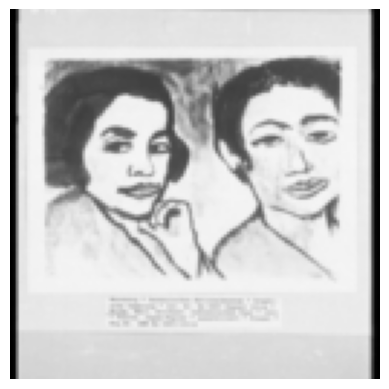

In [41]:
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset

class ArtworkDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = []
        
        # Collect image paths
        for root, _, files in os.walk(image_dir):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):  
                    self.image_paths.append(os.path.join(root, file))  
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, image_path  # Returning both image and path for debugging

# Define image transformations (modify as needed)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize image to 128x128
    transforms.ToTensor(),  # Convert to tensor
])

# Initialize dataset
image_dir = "/Users/albertwelong/cognizant_genai/.venv/capstone_project/updated/artbench-10-imagefolder/"  # <-- Change this to your actual image directory
dataset = ArtworkDataset(image_dir, transform)

# Load one image
if len(dataset) > 0:
    image_tensor, image_path = dataset[0]  # Get the first image
    
    print(f"Processing image: {image_path}")  # Print image path
    
    # Convert tensor to numpy array for visualization
    image_numpy = image_tensor.permute(1, 2, 0).numpy()  # Convert (C, H, W) to (H, W, C)

    # Display the image
    plt.imshow(image_numpy)
    plt.axis("off")
    plt.show()
else:
    print("No images found in the directory.")


torch.Size([3, 64, 64])
<class 'torch.Tensor'>


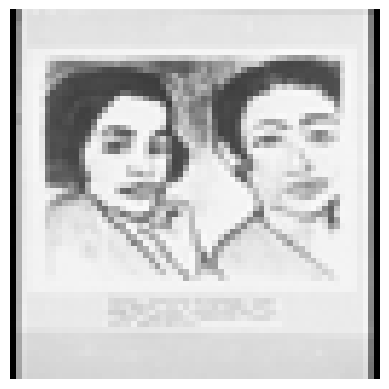

In [53]:
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

# Apply necessary transformations (e.g., resizing, normalization)
transform = transforms.Compose([
    transforms.Resize((64, 64), interpolation=transforms.InterpolationMode.BICUBIC),  # Resize to 64x64
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Set your image directory path
image_directory = '/Users/albertwelong/cognizant_genai/.venv/capstone_project/updated/artbench-10-imagefolder/'  # Adjust with the correct path

# Create the dataset and data loader
dataset = ArtworkDataset(image_dir=image_directory, transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Check one sample from the dataset
sample_image, _ = dataset[0]
print(sample_image.shape)  # Verify shape of the sample image
print(type(sample_image))  # This should output <class 'torch.Tensor'>


# Convert the tensor to a NumPy array (from CHW format to HWC format)
image_numpy = sample_image.permute(1, 2, 0).numpy()

# Denormalize the image (if necessary)
image_numpy = (image_numpy * 0.5) + 0.5  # Reverse the normalization (mean=0.5, std=0.5)

# Display the image
plt.imshow(image_numpy)
plt.axis("off")
plt.show()

# Assuming your dataset is a tensor of shape [batch_size, channels, height, width]
# Check the minimum and maximum values of your dataset
# Check a single sample image's min and max
# def check_data_range(dataloader):
#     for batch_images, _ in dataloader:
#         # Check if any pixel value is outside the [-1, 1] range
#         if (batch_images < -1).any() or (batch_images > 1).any():
#             return False  # If an out-of-bounds value is found, return False
#     return True  # If all values are within the range [-1, 1]

# # Run the check
# is_valid_range = check_data_range(dataloader)

# if is_valid_range:
#     print("All images are within the range [-1, 1].")
# else:
#     print("Some images have values outside the range [-1, 1].")




In [31]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generator model
class Generator(nn.Module):
    def __init__(self, z_dim):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(z_dim, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 3 * 64 * 64)  # Output image size is 64x64x3
        self.relu = nn.ReLU(True)
        self.tanh = nn.Tanh()

    def forward(self, z):
        x = self.relu(self.fc1(z))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        x = x.view(-1, 3, 64, 64)  # Reshape to 64x64 image with 3 channels
        return self.tanh(x)

# Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(3 * 64 * 64, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)
        self.relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 3 * 64 * 64)  # Flatten image to 1D
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return self.sigmoid(x)


In [32]:
import torch

# Test the Generator
z_dim = 100  # Latent vector size (example)
z = torch.randn(8, z_dim)  # Batch of 8 random latent vectors
generator = Generator(z_dim)
generated_images = generator(z)

# Check output shape (should be [8, 3, 64, 64])
print("Generated Images Shape:", generated_images.shape)

# Test the Discriminator
discriminator = Discriminator()
output = discriminator(generated_images)

# Check output shape (should be [8, 1] for batch size 8)
print("Discriminator Output Shape:", output.shape)


Generated Images Shape: torch.Size([8, 3, 64, 64])
Discriminator Output Shape: torch.Size([8, 1])


In [48]:
# If your dataset returns both image and label
for i, (real_images, _) in enumerate(dataloader):
    print(f"Batch {i}: {real_images.shape}, Type: {type(real_images)}")

    real_images = real_images.to(device)
    break  # Exit after the first batch to verify


Batch 0: torch.Size([64, 3, 64, 64]), Type: <class 'torch.Tensor'>


In [54]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set parameters
z_dim = 100  # Latent vector size
batch_size = 64
lr = 0.0002  # Learning rate
num_epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the models
generator = Generator(z_dim).to(device)
discriminator = Discriminator().to(device)

# Binary Cross-Entropy Loss for real vs fake classification
criterion = nn.BCELoss()

# Optimizers (Adam)
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Training Loop
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.size(0)  # Dynamically get the batch size for each iteration
        real_images = real_images.to(device)
        
        # Dynamically create labels based on the current batch size
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ---- Train the Discriminator ----
        optimizer_d.zero_grad()

        # Train on real images
        output_real = discriminator(real_images)
        loss_real = criterion(output_real, real_labels)

        # Train on fake images generated by the generator
        z = torch.randn(batch_size, z_dim).to(device)
        fake_images = generator(z)
        output_fake = discriminator(fake_images.detach())  # Detach to avoid backprop through the generator
        loss_fake = criterion(output_fake, fake_labels)

        # Total loss for discriminator
        loss_d = loss_real + loss_fake

        # Backprop and optimize discriminator
        loss_d.backward()
        optimizer_d.step()

        # ---- Train the Generator ----
        optimizer_g.zero_grad()

        # We want to trick the discriminator, so we want the fake images to be classified as real
        output_fake = discriminator(fake_images)
        loss_g = criterion(output_fake, real_labels)

        # Backprop and optimize generator
        loss_g.backward()
        optimizer_g.step()

        # Print losses every 100 batches (you can adjust this to any frequency)
        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], Loss D: {loss_d.item()}, Loss G: {loss_g.item()}")

    # Optionally: Save generated images or model checkpoints
    if (epoch + 1) % 10 == 0 or (epoch + 1) == num_epochs:
        torch.save(generator.state_dict(), f'generator_epoch_{epoch+1}.pth')
        torch.save(discriminator.state_dict(), f'discriminator_epoch_{epoch+1}.pth')


Epoch [1/100], Step [100/938], Loss D: 0.7755810022354126, Loss G: 0.8771108388900757
Epoch [1/100], Step [200/938], Loss D: 0.3496829867362976, Loss G: 1.6250393390655518
Epoch [1/100], Step [300/938], Loss D: 0.2108028382062912, Loss G: 2.017759084701538
Epoch [1/100], Step [400/938], Loss D: 0.45437929034233093, Loss G: 2.225236415863037
Epoch [1/100], Step [500/938], Loss D: 0.30048927664756775, Loss G: 2.730738878250122
Epoch [1/100], Step [600/938], Loss D: 0.40837764739990234, Loss G: 2.4048025608062744
Epoch [1/100], Step [700/938], Loss D: 0.7845438718795776, Loss G: 1.2407609224319458
Epoch [1/100], Step [800/938], Loss D: 1.2605173587799072, Loss G: 1.335002064704895
Epoch [1/100], Step [900/938], Loss D: 0.9674882292747498, Loss G: 1.746773600578308
Epoch [2/100], Step [100/938], Loss D: 1.1653987169265747, Loss G: 1.7653883695602417
Epoch [2/100], Step [200/938], Loss D: 0.6882447004318237, Loss G: 2.22902774810791
Epoch [2/100], Step [300/938], Loss D: 0.559859037399292, 

In [9]:
# Hyperparameters
z_dim = 100  # Latent space dimension (size of noise vector)
lr = 0.0002  # Learning rate
beta1 = 0.5  # Beta1 for Adam optimizer

# Create instances of the models
generator = Generator(z_dim)
discriminator = Discriminator()

# Set up optimizers
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

# Loss function
criterion = nn.BCELoss()


In [13]:
import torch
from torch.utils.data import DataLoader
import numpy as np

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move models to device
generator = generator.to(device)
discriminator = discriminator.to(device)

# Create data loader
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Number of epochs
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
    for i, real_images in enumerate(dataloader):  # No label to unpack
        # Create labels for real and fake images
        real_labels = torch.ones(real_images.size(0), 1)  # Label for real images
        fake_labels = torch.zeros(real_images.size(0), 1)  # Label for fake images

        # Move data to device (GPU or CPU)
        real_images = real_images.to(device)
        real_labels = real_labels.to(device)
        fake_labels = fake_labels.to(device)

        # Train Discriminator
        # Train with real images
        optimizer_d.zero_grad()
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)
        d_loss_real.backward()

        # Train with fake images
        z = torch.randn(real_images.size(0), z_dim).to(device)  # Random noise
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach())  # Detach to not update generator
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss_fake.backward()

        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)  # We want the generator to fool the discriminator
        g_loss.backward()

        optimizer_g.step()

        # Print losses periodically
        if i % 100 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Step [{i}/{len(dataloader)}], '
                  f'D Loss: {d_loss_real.item() + d_loss_fake.item()}, G Loss: {g_loss.item()}')

    # Save generated images or model checkpoints periodically
    if (epoch + 1) % 10 == 0:
        torch.save(generator.state_dict(), f'generator_epoch_{epoch + 1}.pth')
        torch.save(discriminator.state_dict(), f'discriminator_epoch_{epoch + 1}.pth')

# Generate some sample images after training
z = torch.randn(64, z_dim).to(device)  # Generate 64 random images
generated_images = generator(z)

# Visualize or save generated images here


Epoch [0/100], Step [0/938], D Loss: 0.675939941778779, G Loss: 0.8162589073181152
Epoch [0/100], Step [100/938], D Loss: 0.5762115754187107, G Loss: 1.3189401626586914
Epoch [0/100], Step [200/938], D Loss: 0.37771153450012207, G Loss: 1.5807719230651855
Epoch [0/100], Step [300/938], D Loss: 0.4737371504306793, G Loss: 1.1971256732940674
Epoch [0/100], Step [400/938], D Loss: 0.27803337201476097, G Loss: 2.709618330001831
Epoch [0/100], Step [500/938], D Loss: 1.1757032114546746, G Loss: 1.9677103757858276
Epoch [0/100], Step [600/938], D Loss: 0.32610538601875305, G Loss: 2.0619754791259766
Epoch [0/100], Step [700/938], D Loss: 0.39569835364818573, G Loss: 1.3236629962921143
Epoch [0/100], Step [800/938], D Loss: 1.055018037557602, G Loss: 0.14510168135166168
Epoch [0/100], Step [900/938], D Loss: 1.3639520108699799, G Loss: 2.188950538635254
Epoch [1/100], Step [0/938], D Loss: 0.981394350528717, G Loss: 1.493779182434082
Epoch [1/100], Step [100/938], D Loss: 0.8567653000354767, 